# Table of Contents
* 1. Import and review data  
    * 1.1 Import packages  
    * 1.2 Import data  
    * 1.3 Get overview of dataframe   
    * 1.4 Clean/Remove un-needed columns
* 2. create dummy variables
* 3. Scale standardization
    * 3.1 check for and remove outliers
    * 3.2 Split into train/test sets 
    * 3.3 Transform data with Log transformation

# 1 Import and review data

1.1 Import packages

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


In [2]:
#confirm the disk location is correct for importing
os.chdir('C:/Users/steve/Documents/springboard/Capstone2/data')
cwd = os.getcwd()
print(cwd)

C:\Users\steve\Documents\springboard\Capstone2\data


1.2 Import data

In [3]:
df = pd.read_csv('flights.csv')

1.3: Overview of data

In [4]:
df.head()

,Date,Airline,Flight_number,Origin,Dest,Planned_depart_time,Actual_depart_time,Dep_delay,Cancelled,Distance,...,month,hour_depart,day,dcn,fnstring,airflightnumber,Delay15m,Delayed60m,dcn15,dcn60
0,2018-01-01,UA,2429,EWR,DEN,15:17:00,15:12:00,-5.0,0.0,1605.0,...,1,1900-01-01 15:00:00,Monday,0,2429,UA2429,N,N,0,0
1,2018-01-01,UA,2427,LAS,SFO,11:15:00,11:07:00,-8.0,0.0,414.0,...,1,1900-01-01 11:00:00,Monday,0,2427,UA2427,N,N,0,0
2,2018-01-01,UA,2426,SNA,DEN,13:35:00,13:30:00,-5.0,0.0,846.0,...,1,1900-01-01 14:00:00,Monday,0,2426,UA2426,N,N,0,0
3,2018-01-01,UA,2425,RSW,ORD,15:46:00,15:52:00,6.0,0.0,1120.0,...,1,1900-01-01 16:00:00,Monday,1,2425,UA2425,N,N,0,0
4,2018-01-01,UA,2424,ORD,ALB,06:30:00,06:50:00,20.0,0.0,723.0,...,1,1900-01-01 06:00:00,Monday,1,2424,UA2424,Y,N,1,0


In [5]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7191323 entries, 0 to 7191322
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Date                  7191323 non-null  object 
 1   Airline               7191323 non-null  object 
 2   Flight_number         7191323 non-null  int64  
 3   Origin                7191323 non-null  object 
 4   Dest                  7191323 non-null  object 
 5   Planned_depart_time   7191323 non-null  object 
 6   Actual_depart_time    7079005 non-null  object 
 7   Dep_delay             7079005 non-null  float64
 8   Cancelled             7191323 non-null  float64
 9   Distance              7191323 non-null  float64
 10  Airline_Name          7191323 non-null  object 
 11  Origin_Name           7191323 non-null  object 
 12  Origin_State          7191323 non-null  object 
 13  Dest_Name             7191323 non-null  object 
 14  Dest_State            7191323 non-

1.4 clean/ Remove un-needed columns

In [6]:
#convert month column to object type
df['month']=df['month'].astype('object')

In [7]:
#remove all cancelled flights
df=df.dropna(how='any')

In [8]:
#look at number of unique values for each column/feature
df.nunique()

Date                      365
Airline                    18
Flight_number            7113
Origin                    358
Dest                      358
Planned_depart_time      1368
Actual_depart_time       1440
Dep_delay                1481
Cancelled                   1
Distance                 1546
Airline_Name               18
Origin_Name               340
Origin_State               55
Dest_Name                 340
Dest_State                 55
Delayed_or_Cancelled        2
month                      12
hour_depart                25
day                         7
dcn                         2
fnstring                 7113
airflightnumber         29999
Delay15m                    2
Delayed60m                  2
dcn15                       2
dcn60                       2
dtype: int64

In [9]:
#remove unnecessary columns
fi=df.drop(columns=['dcn15', 'dcn60', 'dcn', 'Airline_Name', 'Origin_Name', 'Dest_Name','fnstring', 'Flight_number',\
                    'Cancelled', 'Delay15m', 'Delayed60m', 'Delayed_or_Cancelled', 'airflightnumber', 'Date', \
                    'Planned_depart_time', 'Actual_depart_time','Origin','Dest'])

*'dcn15', 'dcn60', 'dcn','Delay15m', 'Delayed60m', 'fnstring', and 'airflightnumber', were all temporary columns made for EDA calculations.  
*'Airline_Name', 'Origin_Name', 'Dest_Name' are the same information as 'Airline', 'Origin', and 'Dest'.  
*'Date', 'Planned_depart_time', and 'Actual_depart_time' were previously combined into different groupings to reduce the number of features. Instead of 365 dates, and over 1,350 departure times, the 'month', 'hour_depart', and 'day" columns group this data into more managable features.  
*'Origin', and 'Dest' were previously combined into different groupings to reduce the number of features. Instead of 358 airports, the 'Origin_State' and 'Dest_State' columns group the airports by state/territory, reducing the features to 55.

In [10]:
fi.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 7079005 entries, 0 to 7191322
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Airline       7079005 non-null  object 
 1   Dep_delay     7079005 non-null  float64
 2   Distance      7079005 non-null  float64
 3   Origin_State  7079005 non-null  object 
 4   Dest_State    7079005 non-null  object 
 5   month         7079005 non-null  object 
 6   hour_depart   7079005 non-null  object 
 7   day           7079005 non-null  object 
dtypes: float64(2), object(6)
memory usage: 486.1+ MB


In [11]:
#get the number of unique values in each column
fi.nunique()

Airline           18
Dep_delay       1481
Distance        1546
Origin_State      55
Dest_State        55
month             12
hour_depart       25
day                7
dtype: int64

In [12]:
#combine both midnight hour values 
fi['hour_depart'] = fi['hour_depart'].str.replace('1900-01-02 00:00:00', '1900-01-01 00:00:00')

In [13]:
#save/export reduced dataframe for later use
fi.to_csv(r'C:/Users/steve/Documents/springboard/Capstone2/data/fi.csv', index=False)

# 2 create dummy variables

In [14]:
#create dummy variables
fi_encoded=pd.get_dummies(fi, drop_first=True)

In [15]:
#use shape attribute to confirm the correct number of new feature columns
fi_encoded.shape

(7079005, 167)

# 3 Scale standardization

3.1 check for and remove outliers

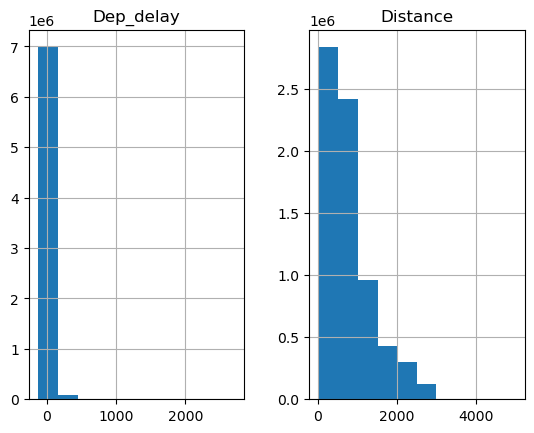

In [16]:
#look at grpahs to determine if their are outliers/which scaler to use
fi_encoded.hist()
plt.show()

In [17]:
pd.set_option('display.float_format', '{:.2f}'.format)
fi_encoded.describe()

,Dep_delay,Distance
count,7079005.00,7079005.00
mean,9.89,802.29
std,44.62,599.27
min,-122.00,31.00
25%,-5.00,363.00
50%,-2.00,634.00
75%,7.00,1035.00
max,2710.00,4983.00


In [18]:
#test for outliers in Dep delay
hicount = fi[fi['Dep_delay'] >750].shape[0]
lowcount = fi[fi['Dep_delay'] <-23].shape[0]
print(hicount)
print(lowcount)

3652
3048


In [19]:
#remove outliers from Dep_delay
new_fi = fi_encoded[(fi_encoded['Dep_delay']<=750) & (fi_encoded['Dep_delay']>=-23)]

In [20]:
#remove distance outliers greater than 3 stds from mean
mean=new_fi['Distance'].mean()
std=new_fi['Distance'].std()
cutoff=std*3
lower,upper = mean-cutoff, mean+cutoff
fi2=new_fi[(new_fi['Distance']<upper) & (new_fi['Distance']>lower)]

In [21]:
fi2.describe()

,Dep_delay,Distance
count,7006467.00,7006467.00
mean,9.43,782.57
std,38.72,563.49
min,-23.00,31.00
25%,-5.00,361.00
50%,-2.00,630.00
75%,7.00,1023.00
max,750.00,2599.00


In [22]:
#save/export encoded dataframe for later use
fi2.to_csv(r'C:/Users/steve/Documents/springboard/Capstone2/data/fi_encoded.csv', index=False)

3.2 Split into train/test sets

In [23]:
#create train/tain sets
from sklearn.model_selection import train_test_split
X = fi2.drop(columns=('Dep_delay'))
y= pd.DataFrame(fi2['Dep_delay'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

3.3 Transform data with Log transformation

In [24]:
#import PowerTransformer
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

#fit Distance column/feature from X_train and transform X_train/X_test
pt.fit(X_train[['Distance']])
X_train_scaled = pt.transform(X_train[['Distance']])
X_test_scaled = pt.transform(X_test[['Distance']])

In [25]:
# Convert the scaled arrays back to DataFrames
X_train_scaleddf = pd.DataFrame(X_train_scaled, columns=['Dist'])
X_test_scaleddf = pd.DataFrame(X_test_scaled, columns=['Dist'])

In [26]:
#combine the transformed data back into the train/test dataframes
X_train_scaled2 = pd.concat([X_train.reset_index(drop=True), X_train_scaleddf], axis=1)
X_test_scaled2 = pd.concat([X_test.reset_index(drop=True), X_test_scaleddf], axis=1)

In [28]:
#remove the old/pretransformed distance column
X_train_final = X_train_scaled2.drop(columns=['Distance'])
X_test_final = X_test_scaled2.drop(columns=['Distance'])

In [29]:
X_train_final.head()

,Airline_AA,Airline_AS,Airline_B6,Airline_DL,Airline_EV,Airline_F9,Airline_G4,Airline_HA,Airline_MQ,Airline_NK,...,hour_depart_1900-01-01 21:00:00,hour_depart_1900-01-01 22:00:00,hour_depart_1900-01-01 23:00:00,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,Dist
0,False,False,False,True,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,-0.93
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,0.76
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,-0.12
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,-1.35
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,-0.09


In [30]:
#initialize PowerTransformer
pt = PowerTransformer()

#fit column/feature from y_train and transform y_train/y_test
pt.fit(y_train)
y_train_scaled = pt.transform(y_train)
y_test_scaled = pt.transform(y_test)

In [32]:
#convert to dataframe
y_train_final = pd.DataFrame(y_train_scaled, columns=['Delay'])
y_test_final = pd.DataFrame(y_test_scaled, columns=['Delay'])

In [33]:
#save/export transformed train/test sets for later use
X_train_final.to_csv(r'C:/Users/steve/Documents/springboard/Capstone2/data/X_train.csv', index=False)

In [34]:
X_test_final.to_csv(r'C:/Users/steve/Documents/springboard/Capstone2/data/X_test.csv', index=False)

In [35]:
y_train_final.to_csv(r'C:/Users/steve/Documents/springboard/Capstone2/data/y_train.csv', index=False)

In [36]:
y_test_final.to_csv(r'C:/Users/steve/Documents/springboard/Capstone2/data/y_test.csv', index=False)